<h1 align=center><font size = 6,5>Final Project 2 (Logistic Regression dan SVM)</font></h1>

# Kelompok 4 - PYTN-KS19

Dini Aryani          : PYTN-KS19-06 <br>
Siti Shafa Adilah    : PYTN-KS19-01 <br>
Faisal Arif Al Faruq : PYTN-KS19-18 <br>

----------------------------------
# A. Perkenalan

## 1. Latar Belakang
Cuaca adalah elemen alam yang memiliki dampak signifikan dalam kehidupan manusia. Dalam aktivitas sehari-hari, banyak keputusan yang sangat bergantung pada kondisi cuaca saat itu. Misalnya, seseorang yang akan melakukan perjalanan memerlukan informasi tentang cuaca untuk menentukan tujuan perjalanan dan waktu yang tepat untuk berangkat. Kemampuan untuk meramalkan cuaca sangat penting karena membantu manusia dalam merencanakan dan mengantisipasi situasi cuaca yang mungkin mempengaruhi aktivitas mereka.

Cuaca dipengaruhi oleh berbagai faktor, termasuk suhu udara, tingkat kelembaban, tekanan udara, kecepatan angin, dan faktor lainnya. Salah satu fenomena cuaca yang sangat berdampak adalah hujan. Hujan adalah peristiwa alam yang tidak dapat dihindari, dan kondisi cuaca adalah faktor utama yang mempengaruhinya. Oleh karena itu, kemampuan untuk meramalkan hujan di masa depan sangat penting.

Proyek ini bertujuan untuk memprediksi apakah akan terjadi hujan di Australia keesokan harinya atau tidak. Untuk melakukan ini, proyek akan membandingkan metode statistik dan pembelajaran mesin, seperti regresi logistik (logistic regression) dan Support Vector Machine (SVM). Dataset yang digunakan dalam proyek ini mencakup pengamatan cuaca harian selama sekitar 10 tahun dari berbagai lokasi di seluruh Australia. Variabel target utama yang ingin diprediksi adalah "RainTomorrow," yang mengindikasikan apakah akan terjadi hujan pada hari berikutnya, dengan kriteria bahwa hujan dianggap terjadi jika curah hujan mencapai 1 mm atau lebih.

Proyek ini memiliki tujuan untuk mengembangkan model prediksi yang dapat membantu orang dalam merencanakan aktivitas mereka berdasarkan perkiraan cuaca di masa depan, terutama ketika akan ada hujan. Dengan menggabungkan pendekatan statistik dan pembelajaran mesin, proyek ini mencoba memberikan solusi yang andal dalam memprediksi hujan, yang pada gilirannya dapat memberikan manfaat dalam berbagai aspek kehidupan sehari-hari.


## 2. Dataset
Analisis ini menggunakan data yang bersumber dari kaggle yaitu <a href="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package" title="Rain in Australia">Rain in Australia</a>. 


## 3. Objektif
- Identifikasi faktor-faktor yang memengaruhi prediksi hujan di wilayah Australia.
- Pembuatan model yang dianggap paling cocok dengan menggunakan metode regresi logistik dan SVM, dengan tujuan untuk mencapai tingkat akurasi yang tinggi.
- Prediksi kejadian hujan di wilayah Australia berdasarkan faktor-faktor yang memengaruhinya menggunakan pendekatan regresi logistik dan SVM.

# B. Import Library

In [1]:
#mengimpor library
import matplotlib as pyplot
import numpy as np
import pandas as pd
import seaborn as sns

# C. Data Loading
Data loading adalah proses memuat data dari berbagai sumber ke dalam perangkat lunak atau lingkungan yang akan digunakan untuk analisis atau pemrosesan data lebih lanjut.


In [2]:
#mengimpor data
df = pd.read_csv('weatherAUS.csv')

In [3]:
#melihat 5 data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#melihat 5 data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


**Keterangan dataset:**

Dataset ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. Dataset ini bertipe data integer, float, dan object. Masing-masing kolom memiliki arti tersendiri, yaitu sebagai berikut:

Attribute Information:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi


In [5]:
#melihat ukuran data
df.shape

(145460, 23)

In [6]:
#melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# D. Data Preprocessing

Data preprocessing adalah serangkaian langkah atau proses yang dilakukan untuk mempersiapkan data mentah sebelum diolah oleh algoritma atau model pembelajaran mesin. 

In [7]:
#mencari missing values di tiap kolom
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
#targetnya adalah RainToday dan RainTomorrow
#tidak boleh ada missing values di kolom tersebut
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [10]:
#kolom data diubah tipenya menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140319 non-null  float64       
 3   MaxTemp        140480 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81093 non-null   float64       
 6   Sunshine       73982 non-null   float64       
 7   WindGustDir    131624 non-null  object        
 8   WindGustSpeed  131682 non-null  float64       
 9   WindDir9am     131127 non-null  object        
 10  WindDir3pm     137117 non-null  object        
 11  WindSpeed9am   139732 non-null  float64       
 12  WindSpeed3pm   138256 non-null  float64       
 13  Humidity9am    139270 non-null  float64       
 14  Humidity3pm    137286 non-null  float64       
 15  

In [12]:
#mencari tau kolom parameter yang berisi kategori
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables:', categorical)

There are 6 categorical variables

The categorical variables: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [13]:
#mengetahui missing values di kolom parameter yang berisi kategori
df[categorical].isnull().sum()

Location           0
WindGustDir     9163
WindDir9am      9660
WindDir3pm      3670
RainToday          0
RainTomorrow       0
dtype: int64

In [14]:
#dari data di atas, dicari mana yang ada missing values
catm = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[catm].isnull().sum())

WindGustDir    9163
WindDir9am     9660
WindDir3pm     3670
dtype: int64


In [15]:
#melihat isi data dari kolom parameter kategori
for var in categorical:
    print(df[var].value_counts())

Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Launceston          3020
Adelaide            3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Albany              2996
Nuriootpa           2996
Sale                2992
Albury              2991
Watsonia            2990
Woomera             2984
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
Witchcliffe         2924
GoldCoast           2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877


In [16]:
#menghitung proporsi munculnya nilai unik dari tiap data
import numpy as np
for var in categorical: 
    print(df[var].value_counts()/float(len(df)))

Canberra            0.024164
Sydney              0.023660
Perth               0.022680
Darwin              0.022673
Hobart              0.022609
Brisbane            0.022246
Bendigo             0.021522
Townsville          0.021501
AliceSprings        0.021486
MountGambier        0.021465
Launceston          0.021451
Adelaide            0.021451
Ballarat            0.021430
PerthAirport        0.021373
MelbourneAirport    0.021373
Mildura             0.021344
SydneyAirport       0.021316
Albany              0.021280
Nuriootpa           0.021280
Sale                0.021252
Albury              0.021245
Watsonia            0.021238
Woomera             0.021195
Portland            0.021195
Cobar               0.021167
Cairns              0.021053
Tuggeranong         0.021018
WaggaWagga          0.021010
NorfolkIsland       0.020911
Wollongong          0.020904
SalmonGums          0.020890
CoffsHarbour        0.020883
Dartmoor            0.020876
Newcastle           0.020804
Witchcliffe   

In [17]:
#melihat banyaknya nilai unik dari tiap kolom
for var in categorical:
    print(var, 'contains', len(df[var].unique()), 'labels')

Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 2 labels
RainTomorrow contains 2 labels


In [18]:
#memisahkan tahun dari kolom Date menjadi kolom baru Year, untuk memudahkan
df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [19]:
#memisahkan bulan dari kolom Date menjadi kolom baru Month
df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [20]:
#memisahkan tanggal hari dari kolom Date menjadi kolom baru Day
df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140319 non-null  float64       
 3   MaxTemp        140480 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81093 non-null   float64       
 6   Sunshine       73982 non-null   float64       
 7   WindGustDir    131624 non-null  object        
 8   WindGustSpeed  131682 non-null  float64       
 9   WindDir9am     131127 non-null  object        
 10  WindDir3pm     137117 non-null  object        
 11  WindSpeed9am   139732 non-null  float64       
 12  WindSpeed3pm   138256 non-null  float64       
 13  Humidity9am    139270 non-null  float64       
 14  Humidity3pm    137286 non-null  float64       
 15  

In [22]:
#karena sudah dipisahkan Day, Month, Year, jadi menghapus kolom Date
df.drop('Date', axis=1, inplace=True)

In [23]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [24]:
#mengetahui nilai unik dari kolom Location
print('Location:', len(df.Location.unique()), 'labels')

Location: 49 labels


In [25]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [26]:
#mengetahui berapa banyak dari tiap nilai unik
df.Location.value_counts()

Canberra            3402
Sydney              3331
Perth               3193
Darwin              3192
Hobart              3183
Brisbane            3132
Bendigo             3030
Townsville          3027
AliceSprings        3025
MountGambier        3022
Launceston          3020
Adelaide            3020
Ballarat            3017
PerthAirport        3009
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Albany              2996
Nuriootpa           2996
Sale                2992
Albury              2991
Watsonia            2990
Woomera             2984
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
SalmonGums          2941
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
Witchcliffe         2924
GoldCoast           2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877


In [27]:
#membuat kolom dummy khusus untuk Location dengan biner 0 atau 1
pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#dilakukan hal yang sama ke WindGustDir
print('WindGustDir:', len(df.WindGustDir.unique()), 'labels')

WindGustDir: 17 labels


In [29]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [30]:
df.WindGustDir.value_counts()

W      9696
SE     9241
E      8985
N      8941
SSE    8905
S      8859
WSW    8802
SW     8702
SSW    8541
WNW    7960
NW     7939
ENE    7924
ESE    7244
NE     7002
NNW    6511
NNE    6372
Name: WindGustDir, dtype: int64

In [31]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE    7924
ESE    7244
N      8941
NE     7002
NNE    6372
NNW    6511
NW     7939
S      8859
SE     9241
SSE    8905
SSW    8541
SW     8702
W      9696
WNW    7960
WSW    8802
NaN    9163
dtype: int64

In [33]:
#dilakukan hal yang sama untuk WindDir9am
print('WindDir9am:', len(df.WindDir9am.unique()), 'labels')

WindDir9am: 17 labels


In [34]:
df.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', nan, 'NW', 'WNW', 'NNE'], dtype=object)

In [35]:
df.WindDir9am.value_counts()

N      11266
SE      9116
E       8977
SSE     8901
NW      8471
S       8424
W       8207
SW      8160
NNE     7877
NNW     7782
ENE     7668
ESE     7518
NE      7477
SSW     7397
WNW     7100
WSW     6786
Name: WindDir9am, dtype: int64

In [36]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7668
ESE     7518
N      11266
NE      7477
NNE     7877
NNW     7782
NW      8471
S       8424
SE      9116
SSE     8901
SSW     7397
SW      8160
W       8207
WNW     7100
WSW     6786
NaN     9660
dtype: int64

In [38]:
#dilakukan hal yang sama untuk WindDir3pm
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [39]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [40]:
df['WindDir3pm'].value_counts()

SE     10578
W       9810
S       9488
WSW     9231
SW      9104
SSE     9038
N       8593
WNW     8564
NW      8394
ESE     8311
E       8272
NE      8107
SSW     7945
NNW     7664
ENE     7645
NNE     6373
Name: WindDir3pm, dtype: int64

In [41]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [42]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7645
ESE     8311
N       8593
NE      8107
NNE     6373
NNW     7664
NW      8394
S       9488
SE     10578
SSE     9038
SSW     7945
SW      9104
W       9810
WNW     8564
WSW     9231
NaN     3670
dtype: int64

In [43]:
print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 2 labels


In [44]:
#mencari tahu berapa banyak kolom numerik
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [45]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [46]:
#mencari tahu missing values dari tiap kolom numerik
df[numerical].isnull().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
Year                 0
Month                0
Day                  0
dtype: int64

In [47]:
#data statistik dari tiap kolom numerik
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  140319.0  140480.0  140787.0      81093.0   73982.0       131682.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      139732.0      138256.0     139270.0     137286.0     127044.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

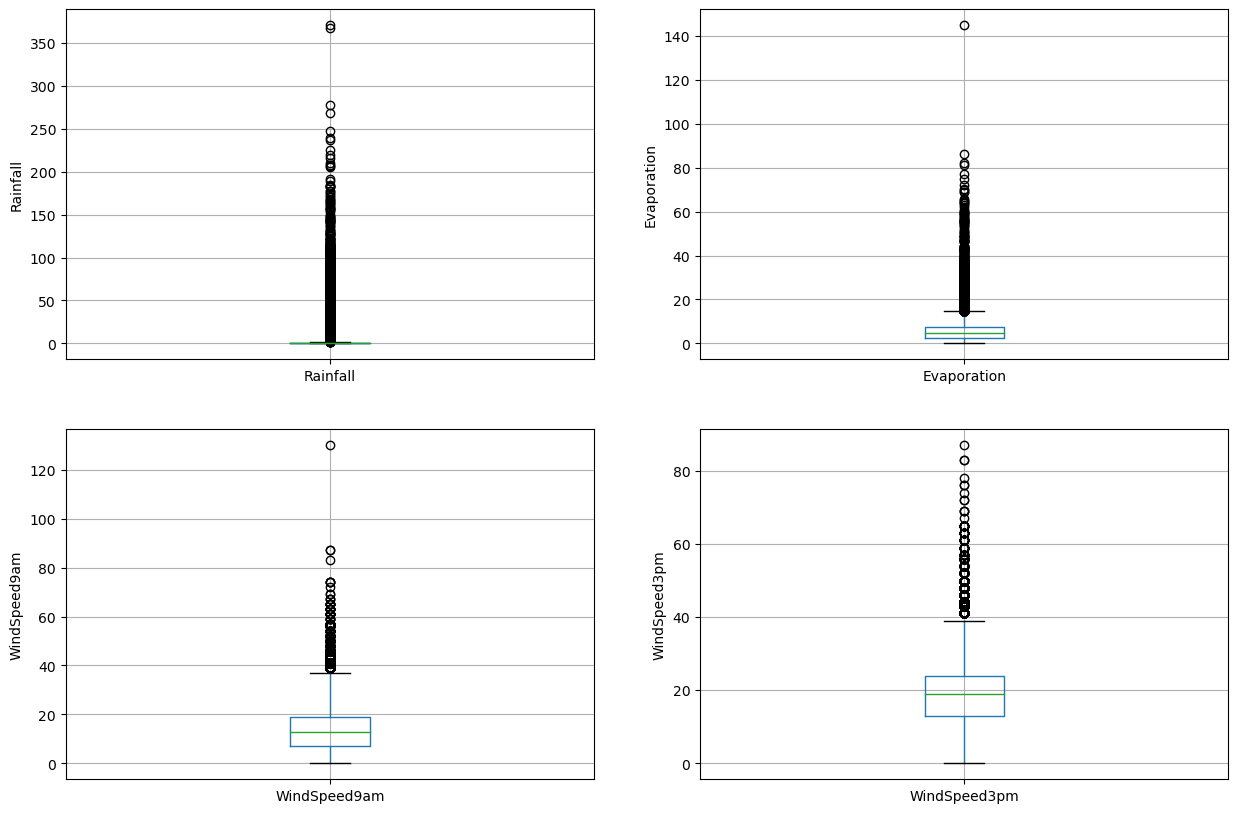

In [48]:
#dari data di atas, kolom Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm terindikasi ada outlier
#membuat boxplot untuk memvisualisasikan kemungkinan outlier
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

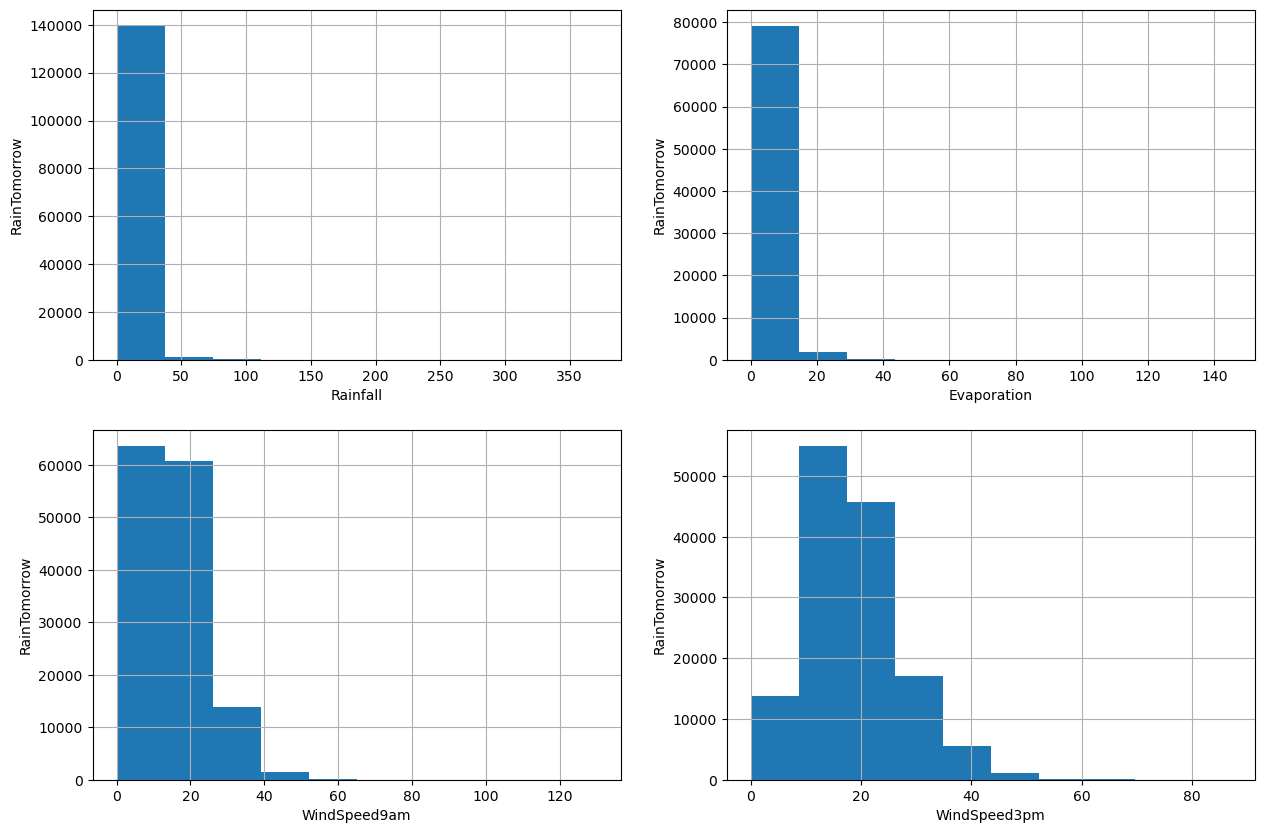

In [49]:
#dari boxplot di atas, terbukti adanya outlier
#mengecek distribusinya dengan histogram
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [50]:
#karena semua histogramnya positive skewed, diaplikasikan interquantile untuk mencari outliers
#di Rainfall
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [51]:
#di Evaporation
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [52]:
#di WindSpeed9am
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [53]:
#di WindSpeed3pm
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [54]:
df.dropna(inplace=True)

# E. Split Data

In [55]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [56]:
y

6049      No
6050      No
6052      No
6053      No
6054      No
          ..
142298    No
142299    No
142300    No
142301    No
142302    No
Name: RainTomorrow, Length: 56420, dtype: object

In [57]:
#Split data menjadi dua, 70% training, 30% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [58]:
#banyaknya data training dan testing
X_train.shape, X_test.shape

((39494, 24), (16926, 24))

In [59]:
#memastikan tidak ada missing values
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [60]:
#memastikan tidak ada missing values
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [61]:
#mengisi missing values dengan hasil yang didapatkan tadi dari IQR
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [62]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [63]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [64]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [65]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [66]:
#download library untuk melabelkan data yang ada di RainToday dan RaunTimorrow
!pip install category_encoders

In [67]:
#dibuat 2 kolom baru RainToday_0 dan RainToday_1
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [68]:
#membuat dataset training X_train
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [69]:
#membuat dataset testing X_test
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [70]:
cols = X_train.columns

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [72]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [73]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [74]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,...,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000,39494.000000
mean,0.541976,0.465740,0.209233,0.251308,0.533512,0.294903,0.257863,0.323594,0.658478,0.495713,...,0.048868,0.047779,0.072138,0.075176,0.058566,0.061300,0.071808,0.070542,0.056591,0.068542
std,0.172124,0.161541,0.368065,0.161646,0.258959,0.123541,0.156497,0.154730,0.185493,0.201718,...,0.215595,0.213302,0.258719,0.263678,0.234813,0.239884,0.258174,0.256062,0.231062,0.252677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.411290,0.337963,0.000000,0.128440,0.344828,0.203704,0.132075,0.200000,0.550000,0.350000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.534946,0.458333,0.000000,0.229358,0.593103,0.277778,0.245283,0.309091,0.670000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.674731,0.592593,0.187500,0.339450,0.737931,0.361111,0.339623,0.436364,0.790000,0.630000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.392473,0.453704,0.0,0.110092,0.758621,0.222222,0.132075,0.272727,0.71,0.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.706989,0.449074,0.0,0.449541,0.117241,0.240741,0.320755,0.363636,0.71,0.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.392473,0.196759,0.5,0.119266,0.400000,0.361111,0.490566,0.509091,0.89,0.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.336022,0.296296,0.0,0.128440,0.682759,0.138889,0.207547,0.236364,0.62,0.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.483871,0.409722,0.0,0.091743,0.406897,0.203704,0.094340,0.163636,0.93,0.63,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# E. Modeling

## Logistic Regression

In [76]:
#modeling ke logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

X_train.dropna(inplace=True)
y_train.dropna(inplace=True)

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [77]:
#prediksi output
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [78]:
#probabilitas output 0 atau tidak hujan
logreg.predict_proba(X_test)[:,0]

array([0.98893886, 0.71192047, 0.60023526, ..., 0.75772684, 0.96575832,
       0.91448381])

In [79]:
#probabilitas output 1 atau hujan
logreg.predict_proba(X_test)[:,1]

array([0.01106114, 0.28807953, 0.39976474, ..., 0.24227316, 0.03424168,
       0.08551619])

In [80]:
#mengecek akurasi dari model logistic regression
import sklearn.metrics as metrics

print('Accuracy LR: ', metrics.accuracy_score(y_test, y_pred_test))

Accuracy LR:  0.8566111308046792


In [81]:
#membuat confusion matrix untuk melihat kemampuannya mendeteksi kebenaran
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[12403   755]
 [ 1672  2096]]

True Positives(TP) =  12403

True Negatives(TN) =  2096

False Positives(FP) =  755

False Negatives(FN) =  1672


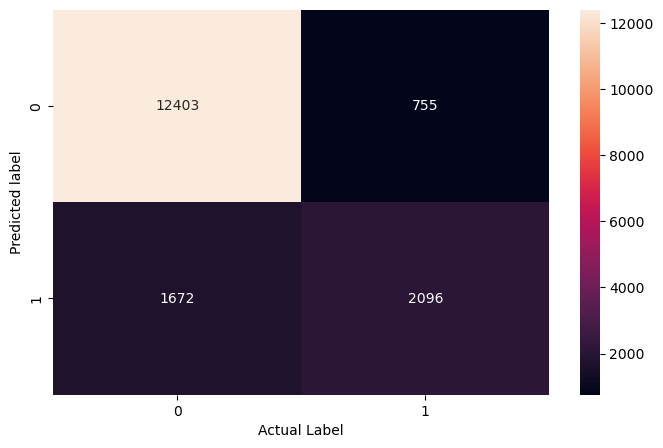

In [82]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Actual Label")
plt.ylabel("Predicted label")
plt.show()

In [83]:
#untuk hasil evaluasi lebih detail, bisa menggunakan classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.88      0.94      0.91     13158
         Yes       0.74      0.56      0.63      3768

    accuracy                           0.86     16926
   macro avg       0.81      0.75      0.77     16926
weighted avg       0.85      0.86      0.85     16926



## SVM

In [84]:
#library untuk model svm
from sklearn import svm

In [85]:
#membuat modeling SVM
clf =  svm.SVC(kernel='linear')


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

#mengecek akurasinya
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.858442632636181


In [86]:
#membuat confusion matrix juga
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[12510   648]
 [ 1748  2020]]

True Positives(TP) =  12510

True Negatives(TN) =  2020

False Positives(FP) =  648

False Negatives(FN) =  1748


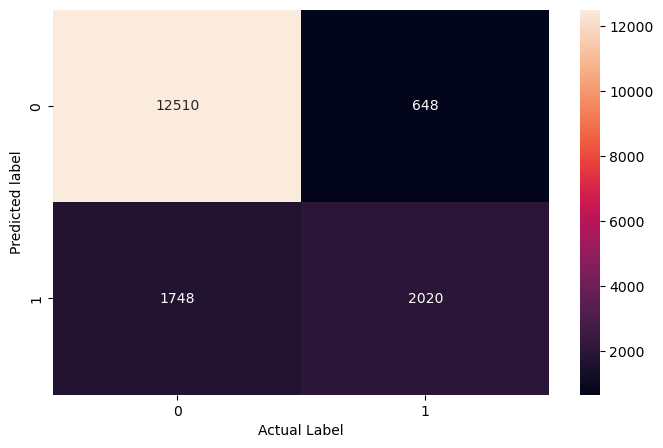

In [87]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Actual Label")
plt.ylabel("Predicted label")
plt.show()

In [88]:
#membuat classification report juga
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.95      0.91     13158
         Yes       0.76      0.54      0.63      3768

    accuracy                           0.86     16926
   macro avg       0.82      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



**Kesimpulan :**

hasil akurasi model Logistic regression adalah 0.8566111308046792, sedangkan hasil akurasi model SVM adalah 0.858442632636181
meskipun berbeda sedikit, sekitar 0,18, tetapi dapat disimpulkan bahwa model SVM lebih cocok untuk data ini, yaitu memprediksi terjadinya hujan.lalu, ada confusion matrix yang menunjukkan seberapa mampunya model memprediksi secara benar, artinya simulasi sama dengan kehidupan nyata.kedua confusion matrix sama-sama mampu lebih baik mendeteksi true positive, atau benar terdeteksi hujan dan sesuai terjadi hujan